# **Facial Expression Classification Using CNN**

Ekspresi wajah dapat menunjukkan suasana hati seseorang dan juga tingkat stress seseorang, dengan memanfaatkan CNN kita bisa mendeteksi suasana hati dan tingkat stress seseorang dari foto seseorang.<br>

## **Import Library**

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

2024-12-07 20:45:11.483260: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-07 20:45:11.494526: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733579111.507109  196500 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733579111.510388  196500 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-07 20:45:11.523752: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## **Load Datasets**

In [2]:
path = 'dataset/'
train_path = os.path.join(path, 'train/')
test_path = os.path.join(path, 'test/')

## **Augmentating Images And Splitting Datasets**

Mengimplementasikan augmentasi gambar untuk menambahkan variasi suatu gambar, sehingga nantinya kita bisa melatih model dengan gambar yang memiliki banyak varian.

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=30,
    brightness_range=[0.8, 1.2],
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
)

Memisahkan antara dataset untuk training model dan untuk validasi model.

In [4]:
train_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale'
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 29178 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## **Making Model**

Mengunakan model sequential, layer Conv2D, MaxPooling2D, dan BatchNormalization yang biasa digunakan untuk melatih model dengan dataset gambar.<br>
Menambahkan layer Dropout untuk mengatasi overfitting.

In [5]:
model = Sequential(
    [
        Conv2D(512, kernel_size=(4,4), activation='relu', padding='same', input_shape=(48,48,1)),
        BatchNormalization(),
        MaxPooling2D(3,3),
        Dropout(0.5),

        Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.5),

        Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.5),

        Flatten(),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(7, 'softmax')
    ]
)

model.summary()

/home/chocomalt/tfgpu/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1733579115.907866  196500 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 512)    │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,619,079 (6.18 MB)

 Trainable params: 1,617,159 (6.17 MB)

 Non-trainable params: 1,920 (7.50 KB)

## **Compiling Model**

In [6]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

## **Setting Up ModelCheckpoint And EarlyStop**

Menginisiasi checkpoint untuk menyimpan hasil akurasi train yang paling baik dan earlystop untuk menghentikan proses training model jika tidak ada peningkatan akurasi sebanyak 5 kali berturut-turut.

In [7]:
checkpoint = ModelCheckpoint("expression.keras", monitor='val_accuracy', save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

## **Training Model**

In [8]:
history=model.fit(
    train_set,
    validation_data=test_set,
    epochs=50,
    callbacks=[checkpoint, earlystop]
)

Epoch 1/50


/home/chocomalt/tfgpu/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733579118.280792  196634 service.cc:148] XLA service 0x7fbc78006cd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733579118.280865  196634 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-12-07 20:45:18.322798: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733579118.521462  196634 cuda_dnn.cc:529] Loaded cuDNN version 90501


  5/912 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.0798 - loss: 3.2625

I0000 00:00:1733579122.362941  196634 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


912/912 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1934 - loss: 2.3245

/home/chocomalt/tfgpu/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.26985, saving model to expression.keras
912/912 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.1935 - loss: 2.3243 - val_accuracy: 0.2699 - val_loss: 1.7588
Epoch 2/50
911/912 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2772 - loss: 1.7869
Epoch 2: val_accuracy improved from 0.26985 to 0.36612, saving model to expression.keras
912/912 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.2773 - loss: 1.7868 - val_accuracy: 0.3661 - val_loss: 1.6539
Epoch 3/50
911/912 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3486 - loss: 1.6416
Epoch 3: val_accuracy improved from 0.36612 to 0.42101, saving model to expression.keras
912/912 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.3486 - loss: 1.6415 - val_accuracy: 0.4210 - val_loss: 1.5238
Epoch 4/50
910/912 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3853 - loss: 1.5662
Epoch 4: val_accuracy improved from 0.42101 to 0.46698, saving model to expression.keras
912/912 ━━━━━━━━━━━━━━━━━━━━

## **Visualizing Accuracy And Loss**

Memvisualisasikan akurasi latihan dan akurasi validasi, serta loss latihan dan loss validasi menggunakan matplotlib

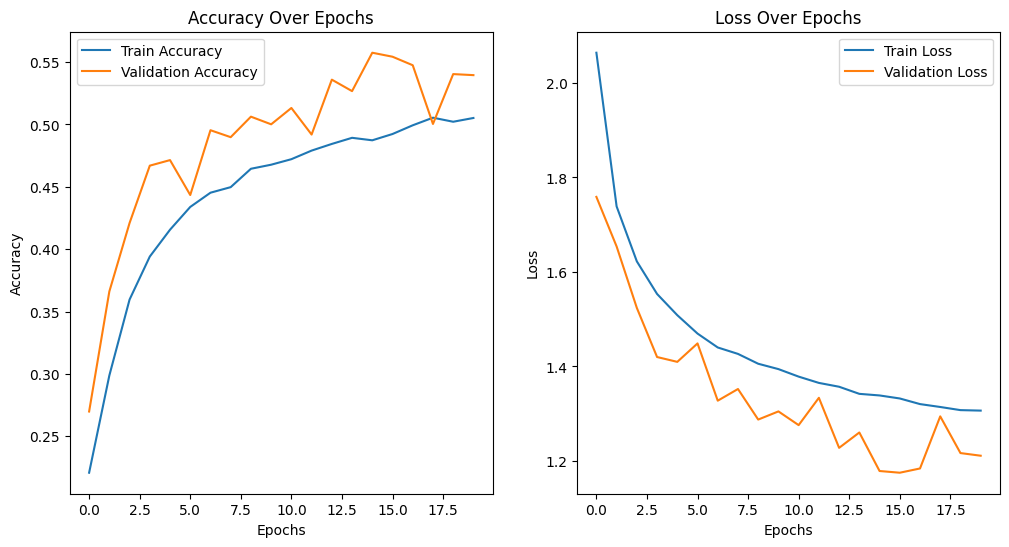

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

## **Evaluating Model**

Mengevaluasi performa model dengan menggunakan confussion matrix dan model.evaluate.<br>
Terlihat bahwa confussion matrix menunjukkan bahwa model memprediksi hampir semua ekspresi sebagai happy, hal ini bisa jadi disebabkan oleh : <br>
1. datasets yang buruk.<br>
2. model yang dilatih dengan kurang baik (overfitting/underfitting).<br>
3. arsitektur model yang kurang kompleks.

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


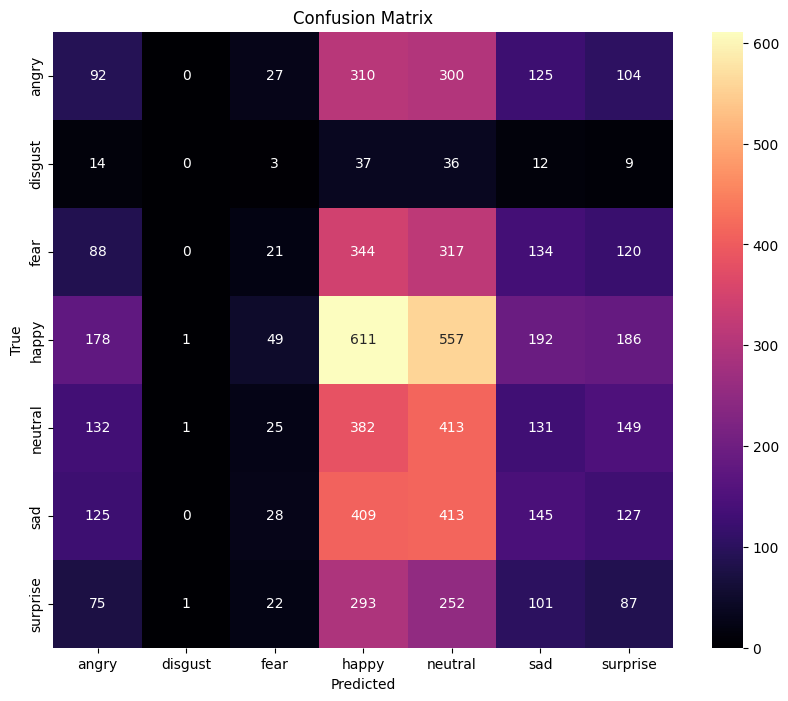

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_set.classes

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [40]:
loss_train, acc_train = model.evaluate(train_set)
loss_val, acc_val = model.evaluate(test_set)
print("===========================================")
print("Train Accuracy: {:.2f}".format(acc_train))
print("Train Loss: {:.2f}".format(loss_train))
print("===========================================")
print("Validation Accuracy: {:.2f}".format(acc_val))
print("Validation Loss: {:.2f}".format(loss_val))
print("===========================================")

912/912 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.5224 - loss: 1.2416
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5366 - loss: 1.1969
Train Accuracy: 0.53
Train Loss: 1.24
Validation Accuracy: 0.54
Validation Loss: 1.21


## **Save Model**

In [14]:
model.save('saved/model_expression_final.h5')